<a href="https://colab.research.google.com/github/hanucherukuri/HR_Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Packages and Datasets

In [290]:
# Warning Libraries 
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import math
import gc
import os

In [291]:
train_data=pd.read_csv("/content/drive/MyDrive/Practice Problems/HR Analytics/train_LZdllcl.csv")

In [292]:
train_data["source"]="train"

In [293]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,train


In [294]:
test_data=pd.read_csv("/content/drive/MyDrive/Practice Problems/HR Analytics/test_2umaH9m.csv")

In [295]:
test_data["source"]="test"

In [296]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,source
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,test
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,test
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,test
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,test
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,test


In [297]:
train_data.shape, test_data.shape

((54808, 15), (23490, 14))

In [298]:
df=pd.concat([train_data, test_data], ignore_index=True)

In [299]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [300]:
df.shape

(78298, 15)

# Descriptive Analytics

In [301]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
source                   object
dtype: object

In [302]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [303]:
#df.apply(lambda x: len(x.unique()))

In [304]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

In [305]:
df.department.value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [306]:
df.region.value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [307]:
df.education.value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [308]:
df.gender.value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [309]:
df.recruitment_channel.value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [310]:
df.recruitment_channel.value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [311]:
df.no_of_trainings.value_counts()

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
9         7
8         7
10        5
Name: no_of_trainings, dtype: int64

In [312]:
df.age.value_counts()

30    5260
31    5060
32    5015
29    4861
33    4597
28    4509
34    4397
27    4061
35    3880
36    3539
37    3064
26    2917
38    2785
39    2446
40    2338
25    1885
41    1874
42    1624
43    1427
44    1203
24    1181
45    1063
46     974
47     813
48     777
50     726
49     650
23     642
51     550
52     518
53     518
54     452
55     429
56     385
57     333
22     329
58     317
60     306
59     292
20     164
21     137
Name: age, dtype: int64

In [313]:
df.previous_year_rating.value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [314]:
df.length_of_service.value_counts()

3     10066
4      9747
2      9554
5      8424
7      7895
6      6772
1      6539
8      4146
9      3699
10     3134
11     1268
12     1122
13      958
15      833
14      810
16      760
17      636
18      558
19      471
20      190
21      107
23       96
22       88
24       88
25       75
26       55
27       52
28       42
29       40
31       27
30       18
32       11
33       10
34        6
37        1
Name: length_of_service, dtype: int64

In [315]:
df.avg_training_score.value_counts()

50    3943
49    3825
48    3521
51    3370
60    3044
      ... 
98      51
99      48
41      37
40       8
39       3
Name: avg_training_score, Length: 61, dtype: int64

In [316]:
df.is_promoted.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

# Data Wrangling

In [317]:
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

In [318]:
df.education.fillna(df.education.mode()[0], inplace=True)

In [319]:
df.previous_year_rating.fillna(df.previous_year_rating.mean(), inplace=True)

# Exploratory Data Analysis

In [320]:
# Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

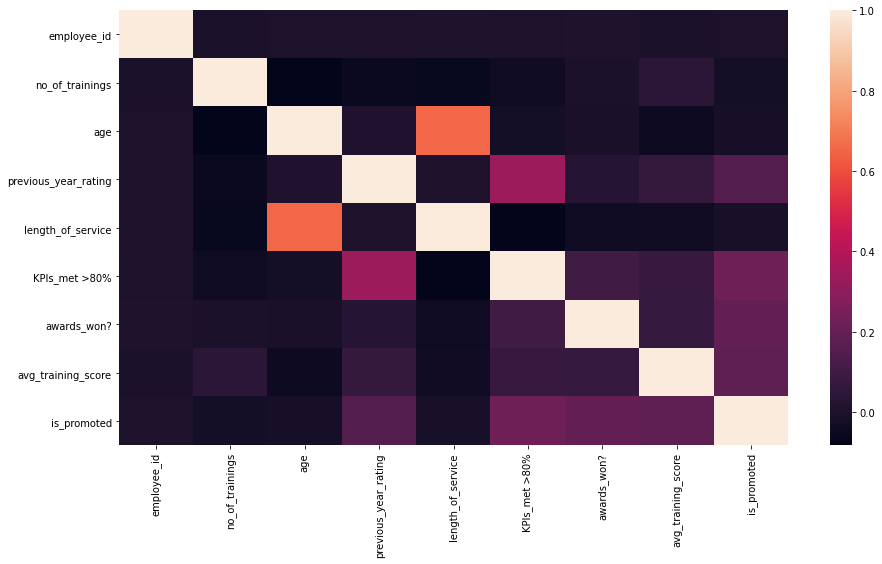

In [321]:
sns.heatmap(df.corr())

In [322]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'source'],
      dtype='object')

In [323]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


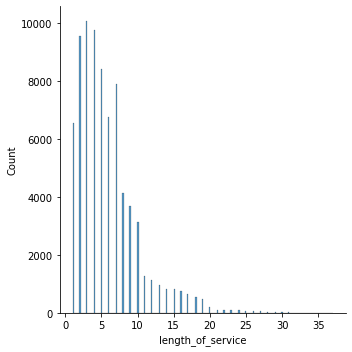

In [324]:
sns.displot(df.length_of_service)

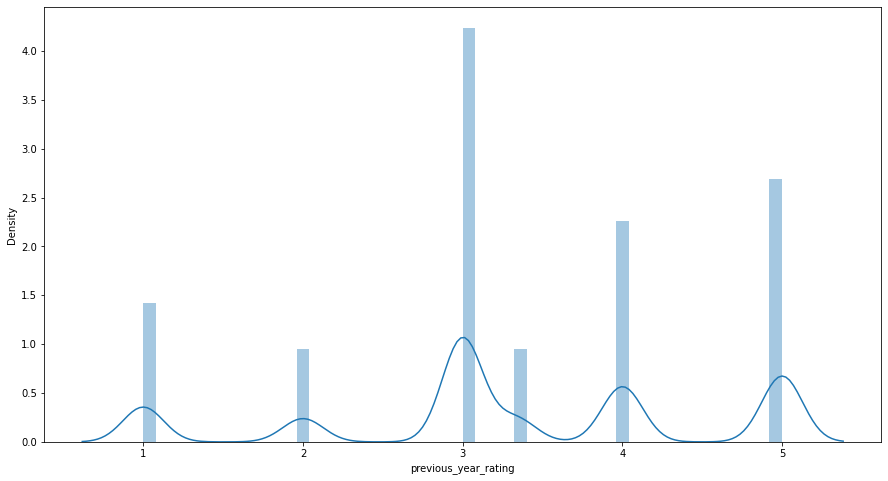

In [325]:
sns.distplot(df.previous_year_rating)

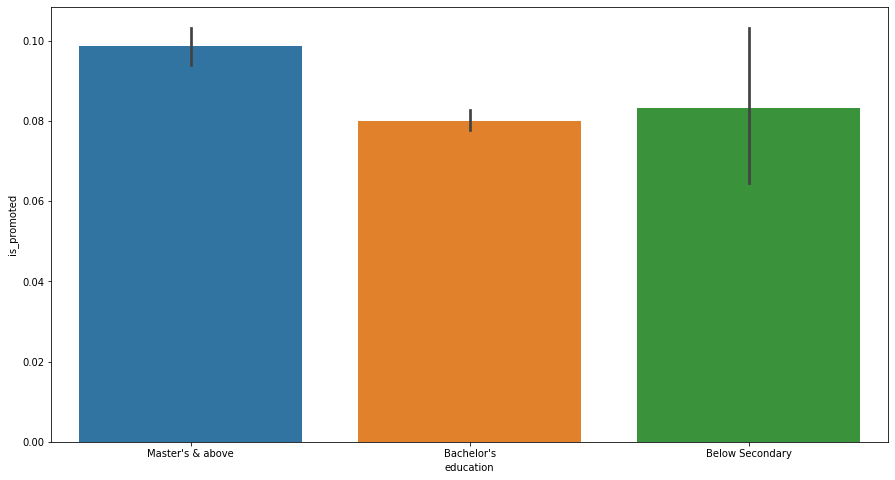

In [326]:
sns.barplot(df.education, df.is_promoted)

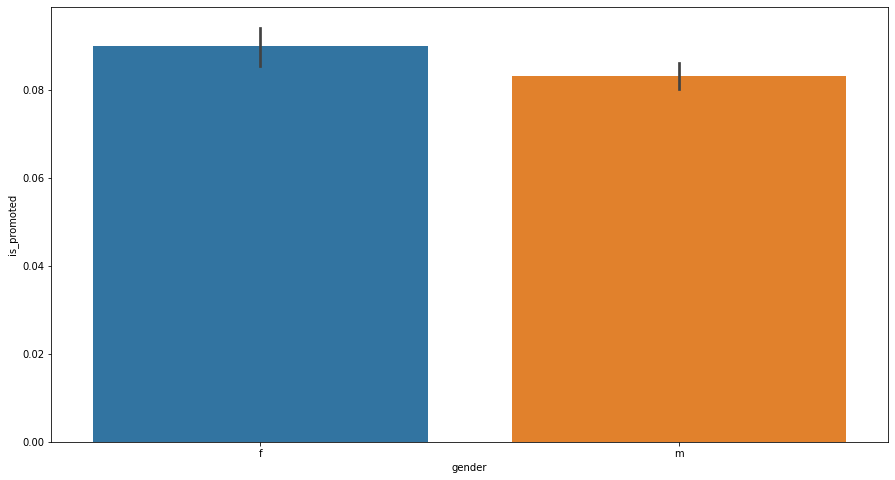

In [327]:
sns.barplot(df.gender, df.is_promoted)

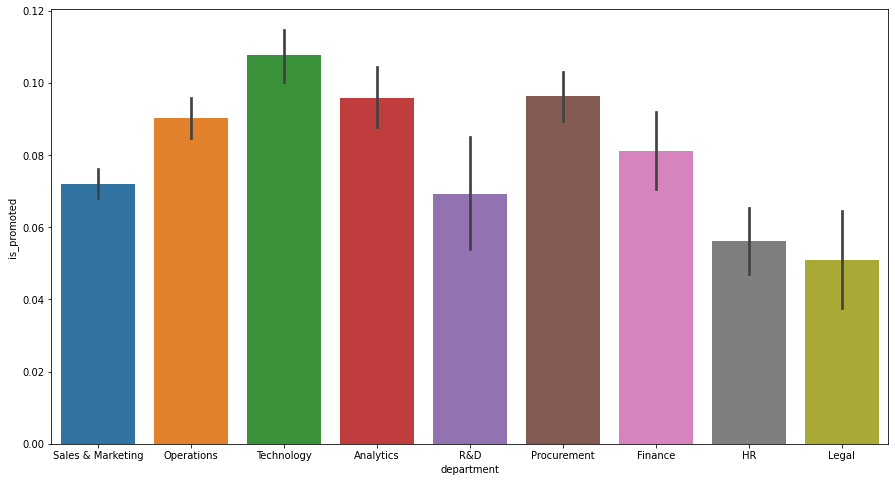

In [328]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(df.department, df.is_promoted)

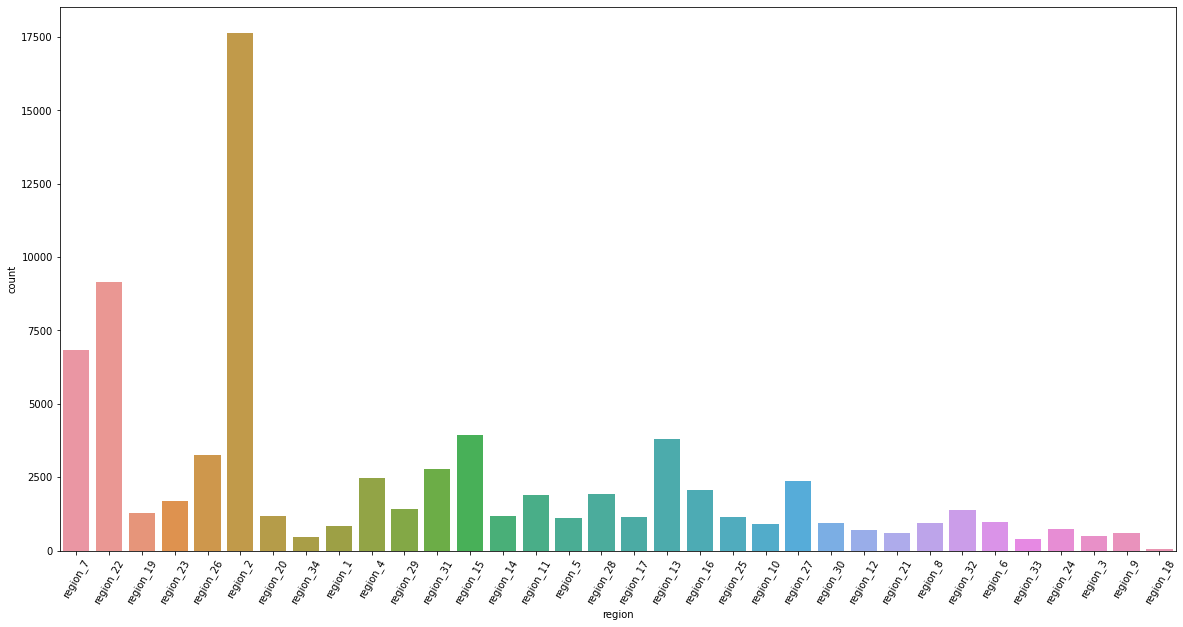

In [329]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df.region)
plt.xticks(rotation = 60)
plt.show()

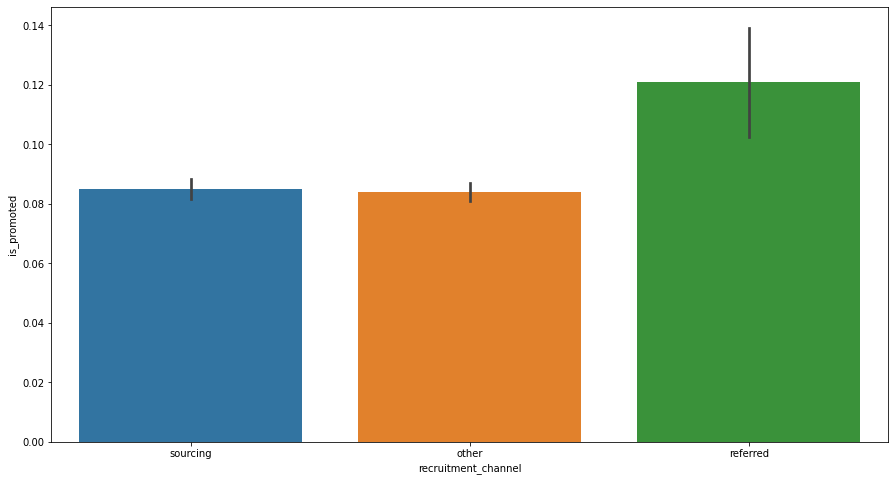

In [330]:
sns.barplot(df.recruitment_channel, df.is_promoted)

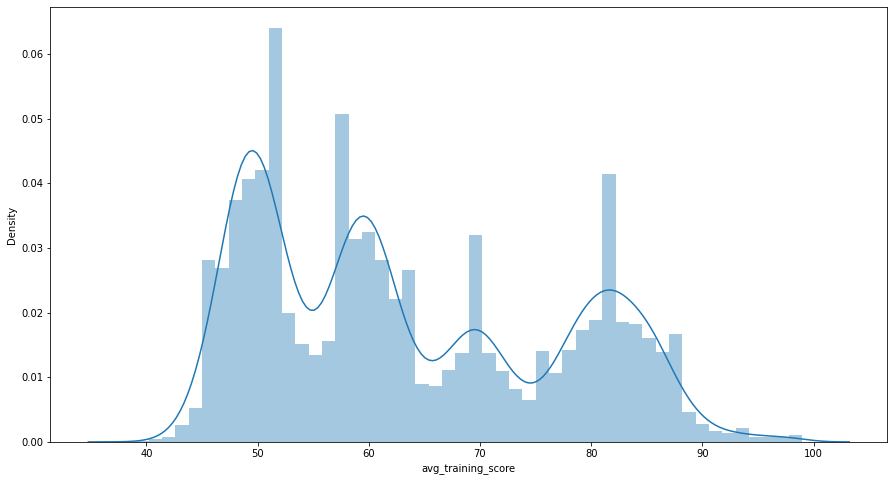

In [331]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(df.avg_training_score)

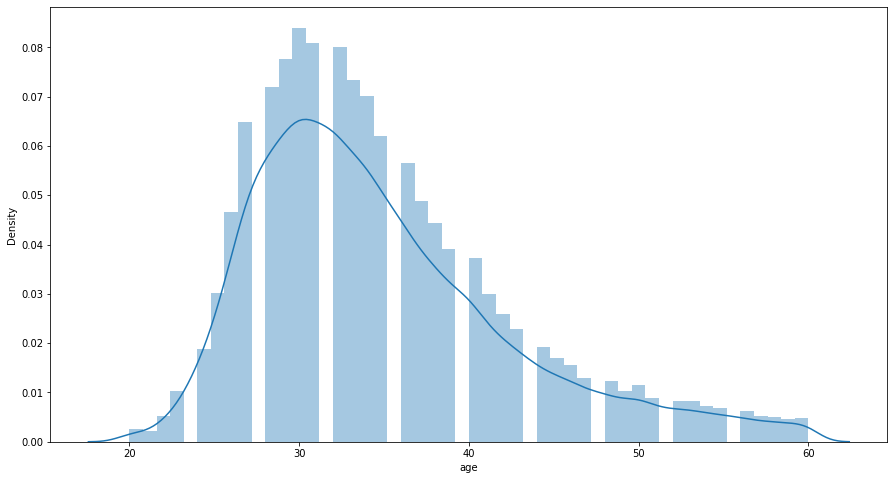

In [332]:
sns.distplot(df.age)

# Data Encoding

In [333]:
from sklearn.preprocessing import LabelEncoder
category=["department", "region", "education", "gender", "recruitment_channel"]
le=LabelEncoder()
for i in category:
  df[i]=le.fit_transform(df[i])

In [334]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0.0,train
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0.0,train
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0.0,train
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0.0,train
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0.0,train


In [335]:
train_data1=df.loc[df["source"]=="train"]
test_data1=df.loc[df["source"]=="test"]

In [336]:
train_data1.shape, test_data1.shape

((54808, 15), (23490, 15))

In [337]:
train_data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0.0,train
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0.0,train
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0.0,train
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0.0,train
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0.0,train


In [338]:
test_data1.drop(["source", "is_promoted"], axis="columns", inplace=True)

In [339]:
train_data1.drop(["source"], axis="columns", inplace=True)

# Split The Data

In [340]:
#Split Train Data into Features(Independent) & Target(Dependent)

X_train= train_data1.drop("is_promoted", axis="columns")
y_train= train_data1["is_promoted"]
y_train = y_train.to_frame()
X_test = test_data1

# Data Scaling

In [341]:
# Data Scaling : RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.preprocessing            import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    return scaling_data
# RobustScaler is better in handling Outliers :
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train_scale = data_scaling( scaling_strategy[0] , X_train, X_train.columns )
X_test_scale  = data_scaling( scaling_strategy [0] , X_test, X_test.columns )
# Display Scaled Train and Test Features :
display(X_train_scale.head())
display(X_train_scale.columns)
display(X_train_scale.head())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.671070,0.666667,1.7,1.0,-1.0,1.0,0.0,0.2,2.0,0.75,1.0,0.0,-0.44
1,0.663467,-0.333333,0.0,0.0,0.0,0.0,0.0,-0.3,2.0,-0.25,0.0,0.0,0.00
2,-0.811876,0.666667,-0.4,0.0,0.0,1.0,0.0,0.1,0.0,0.50,0.0,0.0,-0.40
3,-0.939140,0.666667,0.1,0.0,0.0,0.0,1.0,0.6,-2.0,1.25,0.0,0.0,-0.40
4,0.248830,1.000000,0.4,0.0,0.0,0.0,0.0,1.2,0.0,-0.75,0.0,0.0,0.52


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.671070,0.666667,1.7,1.0,-1.0,1.0,0.0,0.2,2.0,0.75,1.0,0.0,-0.44
1,0.663467,-0.333333,0.0,0.0,0.0,0.0,0.0,-0.3,2.0,-0.25,0.0,0.0,0.00
2,-0.811876,0.666667,-0.4,0.0,0.0,1.0,0.0,0.1,0.0,0.50,0.0,0.0,-0.40
3,-0.939140,0.666667,0.1,0.0,0.0,0.0,1.0,0.6,-2.0,1.25,0.0,0.0,-0.40
4,0.248830,1.000000,0.4,0.0,0.0,0.0,0.0,1.2,0.0,-0.75,0.0,0.0,0.52


# Baseline Machine Learning Model

In [342]:
from sklearn.ensemble                 import VotingClassifier
from sklearn.metrics                  import f1_score
# Boosting Algorithms 
from xgboost                          import XGBClassifier
!pip install catboost
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier


In [343]:
# Baseline Model Without Hyperparameters :
Classifiers = {'0.XGBoost' : XGBClassifier(),
               '1.CatBoost' : CatBoostClassifier(),
               '2.LightGBM' : LGBMClassifier()
 }

In [344]:
# Fine Tuned Model With-Hyperparameters :
Classifiers = {'0.XGBoost' : XGBClassifier(learning_rate =0.1,
                                           n_estimators=494,
                                           max_depth=5,
                                           subsample = 0.70,
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2),
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15,
                                                 n_estimators=494,
                                                 subsample=0.085,
                                                 max_depth=5,
                                                 scale_pos_weight=2.5),
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15,
                                             n_estimators=494,
                                             max_depth=5,
                                             scale_pos_weight=2.5)
 }

# Ensemble with Voting Classifier

In [345]:
#Ensemble with Voting Classifier to Improve the  – “F1-Score” and Predict Target “is_promoted”

voting_model = VotingClassifier(estimators=[
('XGBoost_Best', list(Classifiers.values())[0]),
('CatBoost_Best', list(Classifiers.values())[1]),
('LightGBM_Best', list(Classifiers.values())[2]),
],
voting='soft',weights=[5,5,5.2])
voting_model.fit(X_train_scale,y_train)
predictions_of_voting = voting_model.predict_proba( X_test_scale )[::,1]

0:	learn: 0.5917985	total: 20.4ms	remaining: 10.1s
1:	learn: 0.5023743	total: 40.1ms	remaining: 9.86s
2:	learn: 0.4572012	total: 59.7ms	remaining: 9.77s
3:	learn: 0.4260434	total: 79.5ms	remaining: 9.74s
4:	learn: 0.4091111	total: 99.2ms	remaining: 9.7s
5:	learn: 0.3899053	total: 118ms	remaining: 9.61s
6:	learn: 0.3755573	total: 137ms	remaining: 9.53s
7:	learn: 0.3713260	total: 156ms	remaining: 9.45s
8:	learn: 0.3643498	total: 175ms	remaining: 9.43s
9:	learn: 0.3563764	total: 192ms	remaining: 9.31s
10:	learn: 0.3535250	total: 211ms	remaining: 9.25s
11:	learn: 0.3394588	total: 235ms	remaining: 9.42s
12:	learn: 0.3271270	total: 254ms	remaining: 9.38s
13:	learn: 0.3217159	total: 273ms	remaining: 9.37s
14:	learn: 0.3201475	total: 290ms	remaining: 9.25s
15:	learn: 0.3161955	total: 308ms	remaining: 9.19s
16:	learn: 0.3146470	total: 327ms	remaining: 9.18s
17:	learn: 0.3122251	total: 343ms	remaining: 9.07s
18:	learn: 0.3064443	total: 363ms	remaining: 9.06s
19:	learn: 0.3057206	total: 379ms	rem

In [346]:
#Result Submission, Check Leaderboard & Improve “F1” Score
# Round off the Probability Results :
predictions = [int(round(value)) for value in predictions_of_voting]

In [349]:
# Create a Dataframe Table for Submission Purpose :
Result_Promoted = pd.DataFrame({'employee_id': test_data["employee_id"], 'is_promoted' : predictions})
Result_Promoted

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [348]:
Result_Promoted.to_csv("result.csv",index=False)